In [4]:
CURRENT_SAMPLE="S1W7D21_10_16_10"
# import helper functions including automated setup
from agilentpyvisa.reram_helpers_B1500 import *

# display images in the notebook %matplotlib notebook makes them interactive!
%matplotlib inline

import os
import os.path
today=datetime.today().strftime("%Y-%m-%d")
already_in = today in os.path.abspath(".")
if not already_in and not os.path.exists(today):
    os.mkdir(today)
if not already_in:
    os.chdir(today)
print("Working directory:")
print(os.path.abspath("."))

form_data={}
annealing_data={}


Working directory:
C:\Users\krawczuk\Desktop\agilentpyvisa\2016-07-22


# Sample tests

Below is how I used the setup above when testing, together with the results

                 EI            ET          EV  cumulative_energy             R
count  2.000000e+02    200.000000  200.000000         200.000000    200.000000
mean   1.956217e-04  70777.824200    1.500000           0.000145   7372.979307
std    3.071753e-05      0.274441    0.876928           0.000106   4216.170275
min   -2.900000e-08  70777.310000    0.000000          -0.000000     -0.000000
25%    2.012000e-04  70777.590000    0.749937           0.000037   3724.018709
50%    2.032250e-04  70777.825000    1.500000           0.000146   7379.992677
75%    2.047125e-04  70778.060000    2.250063           0.000254  10987.284738
max    2.063500e-04  70778.310000    3.000000           0.000289  14573.718727
983.5607594871449
0.0


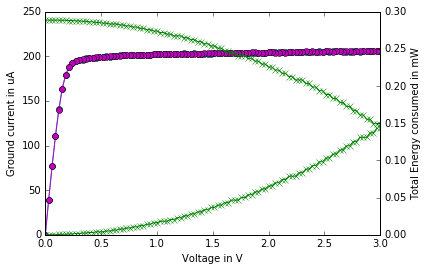

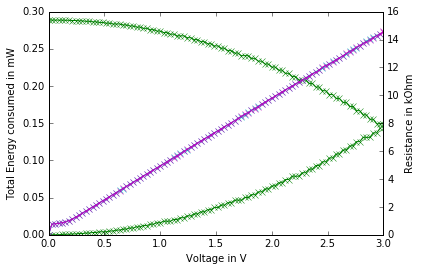

In [2]:
form_sweep= plt.figure(figsize=[10,5])
f=form(3,100,10e-3, mrange=MeasureRanges_I.uA10_limited,gate=1.9)
f.to_csv("{}_form_3V.csv".format(datetime.now().strftime('%Y-%m-%d_%H-%M-%S')))
plt.autoscale()
form_data={}
form_data['FORM_GATE']=1.9
print(checkR(CURRENT_SAMPLE))
form_data['FORM_V']=find_set_V(f)
print(form_data['FORM_V'])

983.5233988597025
                 EI            ET          EV  cumulative_energy             R
count  2.000000e+02    200.000000  200.000000         200.000000    200.000000
mean  -3.141279e-04  70785.452100   -0.750000           0.000168   9790.127167
std    3.953521e-04      0.282812    0.438458           0.000093   8720.719484
min   -1.339000e-03  70784.920000   -1.500000          -0.000000     -0.000000
25%   -4.594750e-04  70785.210000   -1.125000           0.000084    627.342711
50%   -1.346750e-04  70785.460000   -0.750000           0.000216  10020.274584
75%   -4.564375e-05  70785.692500   -0.375000           0.000242  15075.950151
max   -2.000000e-09  70785.940000    0.000000           0.000245  32845.528455
33108.4229390681


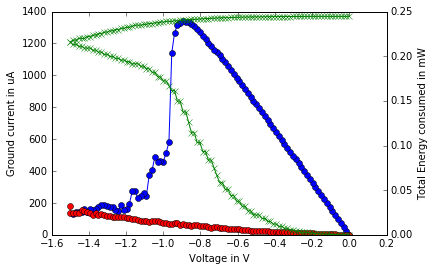

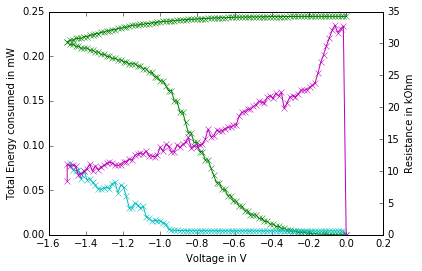

In [3]:
print(checkR(CURRENT_SAMPLE))
r=reset_sweep(-1.5,100,5e-3, mrange=MeasureRanges_I.uA10_limited,gate=1.9,plot=True)
r.to_csv("{}_reset_{}.csv".format(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'), CURRENT_SAMPLE))
print(checkR(CURRENT_SAMPLE))

29544.673539518903
                 EI            ET          EV  cumulative_energy             R
count  2.000000e+02    200.000000  200.000000         200.000000    200.000000
mean   1.168466e-04  70794.022800    0.500001           0.000036   9409.131109
std    8.304091e-05      0.285272    0.292322           0.000031   9968.330825
min   -3.500000e-09  70793.510000    0.000000          -0.000000     -0.000000
25%    2.070000e-05  70793.780000    0.249975           0.000001   2788.266963
50%    1.477000e-04  70794.030000    0.500050           0.000034   4037.966801
75%    1.982625e-04  70794.262500    0.750025           0.000069  16360.782522
max    2.005500e-04  70794.510000    1.000000           0.000076  32182.687201
3369.101550698363


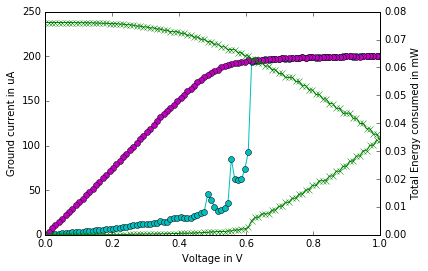

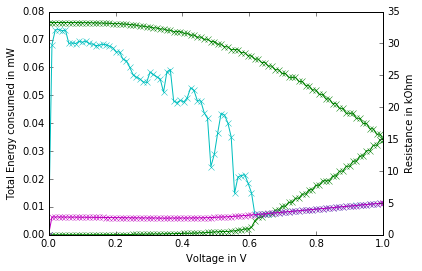

In [4]:
print(checkR(CURRENT_SAMPLE))
s=set_sweep(1.0,100,5e-3, mrange=MeasureRanges_I.uA10_limited,gate=1.9,plot=True)
s.to_csv("{}_set_{}.csv".format(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'), CURRENT_SAMPLE))
print(checkR(CURRENT_SAMPLE))

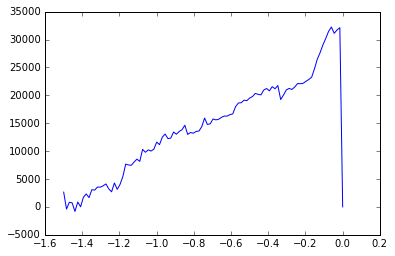

In [9]:
rh=get_hist(r)
plt.plot(rh['EV'],rh['R'])

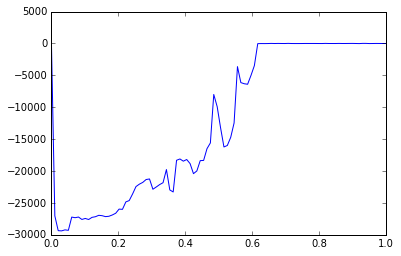

In [10]:
sh=get_hist(s)
plt.plot(sh['EV'],sh['R'])

Reset with Peak -1.5V, 100 steps, gate 1.9V
                 EI            ET          EV  cumulative_energy             R
count  2.000000e+02    200.000000  200.000000         200.000000    200.000000
mean  -3.089400e-04  70921.141300   -0.750000           0.000172   7861.596309
std    3.662467e-04      0.313733    0.438458           0.000097   6489.105018
min   -1.264500e-03  70920.560000   -1.500000          -0.000000     -0.000000
25%   -4.338000e-04  70920.867500   -1.125000           0.000085    642.429032
50%   -1.557750e-04  70921.170000   -0.750000           0.000215   7820.341095
75%   -5.887875e-05  70921.420000   -0.375000           0.000254  12869.159797
max   -7.500000e-09  70921.670000    0.000000           0.000257  21555.523958
Histmax 20920.41712982623
HRS 18570.378151260502
Set with Peak 1.0V, 100 steps, gate 1.9V
                 EI            ET          EV  cumulative_energy            R
count  2.000000e+02    200.000000  200.000000         200.000000   200.000000

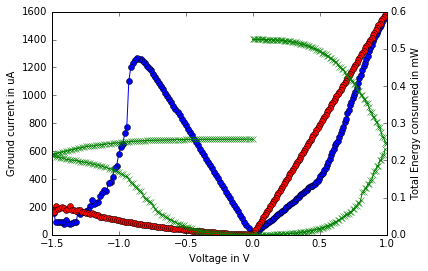

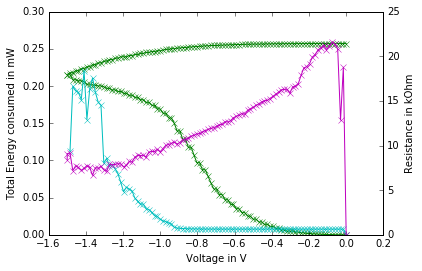

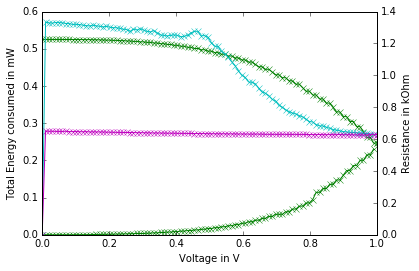

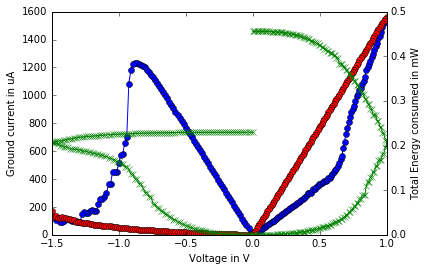

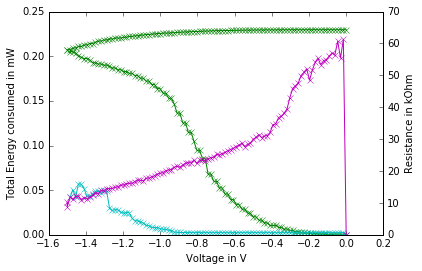

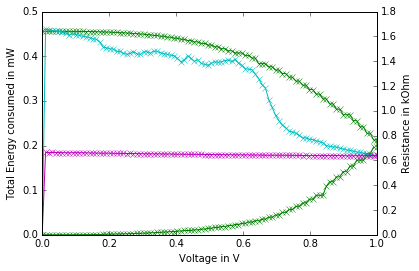

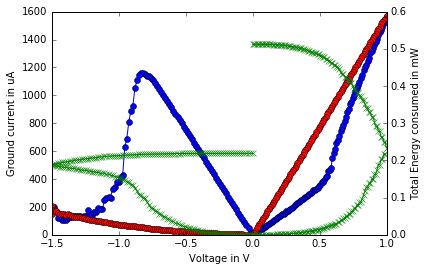

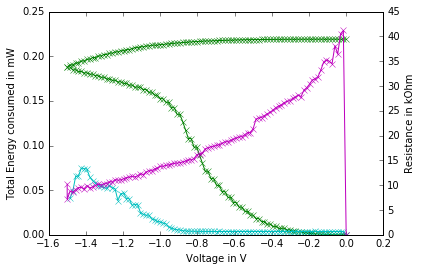

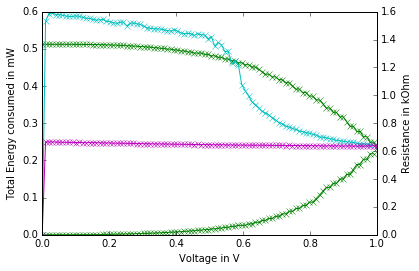

In [11]:
perc = np.ones(3)
iters= len(perc) 



frames,annealing_data=anneal(setV=1.0,resetV=-1.5,gateV=1.9,steps=100,times=3, plot=True,sleep_between=1)

In [8]:
fhr

,0_0,0_1,0_2,1_0,1_1,1_2,2_0,2_1,2_2,Resistance,Type,Voltage,gateVoltage,slope,width
0,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
1,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
2,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
3,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
4,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
5,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
6,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
7,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0...

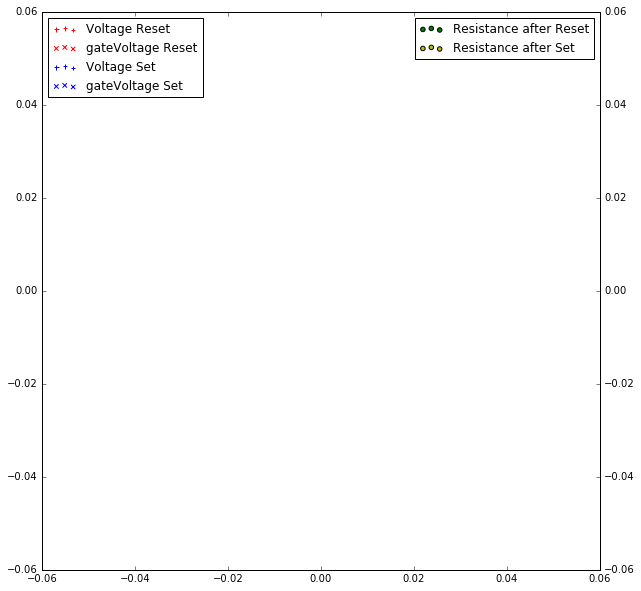

In [9]:


annealing_data={0: {'RESET_HISTMAX': 20920.41712982623,
  'SET_HISTMAX': 682.88580611129908,
  'SET_V': 0.81820000000000004},
 1: {'RESET_HISTMAX': 60643.376421887973,
  'SET_HISTMAX': 991.21684807830559,
  'SET_V': 0.67679999999999996},
 2: {'RESET_HISTMAX': 40529.813842166324,
  'SET_HISTMAX': 923.58516438282629,
  'SET_V': 0.59599999999999997}}
find_hrs=get_series(10,-3.4,width=500e-6,slope=.2,count=100)
find_hrs=insert_read_every(find_hrs,1)
find_out=consume_patterns(find_hrs,CURRENT_SAMPLE)
fhr =parse_job_results(find_out, annealing_data=annealing_data, form_data=form_data)

plot_pattern_results(fhr)

In [12]:
fhr

,0_0,0_1,0_2,1_0,1_1,1_2,2_0,2_1,2_2,Resistance,Type,Voltage,gateVoltage,slope,width
0,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
1,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
2,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
3,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
4,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
5,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
6,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....",None,None,None,None,None,None
7,"{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0....","{'SET_HISTMAX': 923.5851643828263, 'SET_V': 0....","{'SET_HISTMAX': 682.8858061112991, 'SET_V': 0....","{'SET_HISTMAX': 991.2168480783056, 'SET_V': 0...